In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
data_df=pd.read_csv("C:/Users/TARUN SAMANTA/Desktop/Compressed/creditcard.csv")

In [10]:
data_df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
data_df.shape

(284807, 31)

In [14]:
data_df.columns #displays all columns name

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
data_df[["Amount",'Time','Class']].describe() 

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [16]:
data_df.isna().any() #is there any null values or not in any column

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [20]:
#Percentage of total not fraud transaction

nfcount=0
notFraud=data_df['Class']
for i in range(len(notFraud)):
    if notFraud[i]==0:
        nfcount+=1
        
print(nfcount)
percen_nf=(nfcount/len(notFraud))*100
print("Percentage of total not fraud transaction in the dataset: ",percen_nf)

284315
Percentage of total not fraud transaction in the dataset:  99.82725143693798


In [21]:
#Percentage of total fraud transaction
fcount=0
Fraud=data_df['Class']
for i in range(len(notFraud)):
    if notFraud[i]==1:
        fcount+=1
        
print(fcount)
percen_f=(fcount/len(Fraud))*100
print("Percentage of total not fraud transaction in the dataset: ",percen_f)

492
Percentage of total not fraud transaction in the dataset:  0.1727485630620034


In [39]:
#Plotiing 
plot_data=pd.DataFrame()
plot_data['transaction']=data_df['Class']



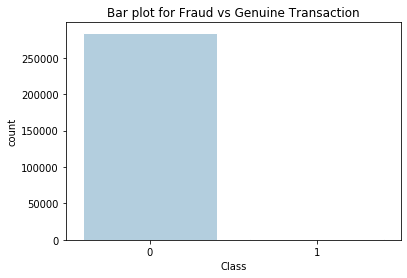

In [40]:
plt.title("Bar plot for Fraud vs Genuine Transaction")
sns.countplot(x='Class',data=data_df,palette='Blues', edgecolor='w')

Text(0.5, 1.0, 'Time vs amount')

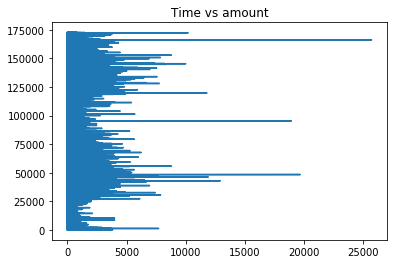

In [41]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.title('Time vs amount')


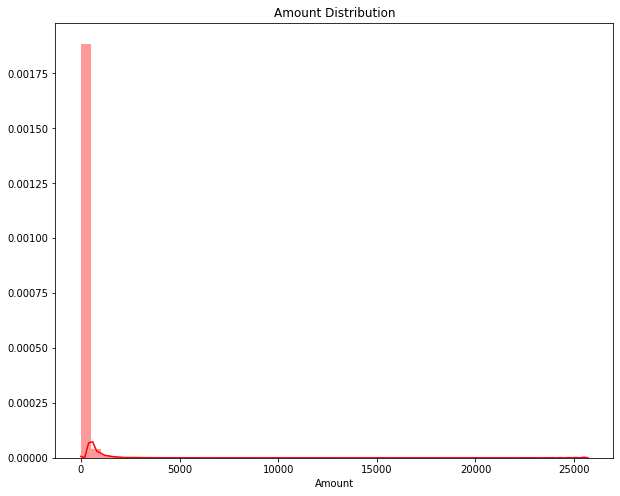

In [42]:
plt.figure(figsize=(10,8),)
plt.title('Amount Distribution')
sns.distplot(data_df['Amount'],color='red')

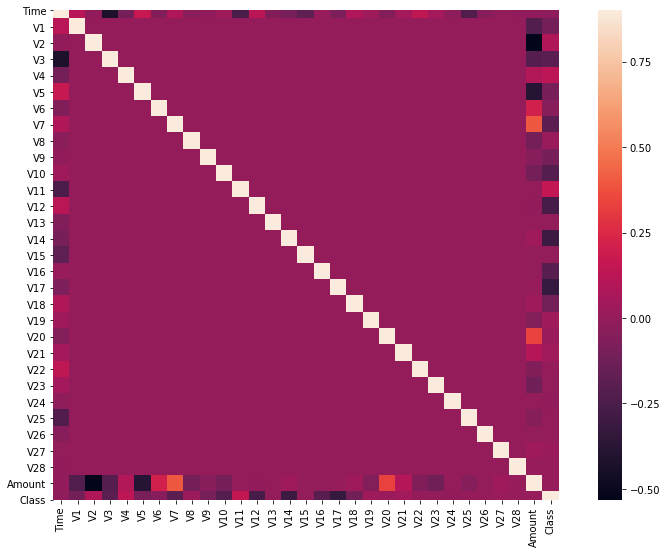

In [43]:
#Correlation matrix: It helps us to understand the correlation between two attributes
correlation_metrics=data_df.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, vmax= .9,square=True)
plt.show()

In [44]:
#To start with modelling First we need to split the dataset
#80% of the data used to train the model
#20% of the data used to test the model

x=data_df.drop(['Class'],axis=1) # drop the target variable
y=data_df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
x_train.shape

(227845, 30)

In [47]:
log=LogisticRegression()
log.fit(x_train,y_train)

C:\Users\TARUN SAMANTA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred=log.predict(x_test)

In [49]:
y_pred[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
accuracy=log.score(x_test,y_test)
accuracy

0.9989993328885924

In [ ]:
#confusion matrix
# -Positive(P): Observation is positive e.g. The transaction is geniune
# -Negative(N): Observation is not positive e.g. Th transaction is not geniune
# -True Positive(TP): observation is positive, but is predicted to be positive
# -False Negative(FN): observation is positive, but is predicted negative
# -True Negative(TN): observation is negative, but is predicted to be negative
# -False Positive(FP): observation is negative, but is predicted to be positive



In [52]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[56853    11]
 [   46    52]]


In [55]:
accu=((56853+52)/(56853+52+11+46))*100

In [56]:
print("Accuracy Score of the Logistic Regression Model", accu)

Accuracy Score of the Logistic Regression Model 99.89993328885924
